In [3]:
import pandas as pd
import re
import numpy as np



In [104]:
data=pd.read_excel('C:/Users/jaehyoulee/Desktop/data/2_1_ELC_new/통합new.xlsx')

TypeError: read_excel() got an unexpected keyword argument 'unrow'

In [106]:
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,질문 (Inquiry),관찰 (Observation),문서검사 (Examination),재수행 (Reperformance),Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,통제구성요소,구성요소이름,통제번호,통제이름,원칙#,원칙이름,원칙 달성을 위한 중점고려사항,통제위험,통제목적,통제활동,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,통제평가자,회사정보
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,표본수,평가 방법,NaN,NaN,NaN,평가 절차,평가 수행 내역,평가 결론,NaN,NaN
2,CE,통제환경,CE_01,윤리경영의 이사회와 경영진 의지,P1,회사는 도덕성과 윤리적 가치에 대한 책임을 강조한다.,•경영진과 이사회의 의지,이사회 및 경영진이 추구하는 도덕성 및 윤리적 가치가 모든 임직원을 포함하여 외부 ...,이사회 및 경영진이 추구하는 도덕성 및 윤리적 가치가 모든 임직원을 포함하여 외부 ...,이사회 및 경영진은 도덕성과 윤리적 가치를 다양한 형태로 모든 임직원을 포함한 외부...,...,모집단 별 1 건,O,,O,NaN,경영진과 이사회의 의지 (문단 38.1)\n1. 윤리규범을 검토하여 경영진의 도덕성...,상기 IPE에 따라 본 통제활동을 평가한 내역은 다음과 같음.\n\n1. 윤리규범을...,적정,NaN,지엔씨
3,CE,통제환경,CE_03,윤리경영 프로그램 평가,P1,회사는 도덕성과 윤리적 가치에 대한 책임을 강조한다.,•윤리강령 준수 평가,윤리경영 준수에 대한 평가가 이루어지지 않아 임직원 및 외부 이해관계자에 의해 윤리...,윤리경영 준수에 대한 평가가 임직원 및 외부 이해관계자를 대상으로 실시되어 윤리경영...,임직원 및 외부 이해관계자의 윤리규범 준수를 위해 윤리경영 준수에 대한 평가가 실시...,...,모집단 별 1 건,O,,O,NaN,윤리강령 준수 평가 (문단 38.3)\n1. 윤리 교육프로그램 운영현황 등의 문서를...,입수한 증적을 기반으로 평가 요소를 검토한 내용은 아래와 같음.\n\n 1) 윤...,적정,NaN,지엔씨
4,CE,통제환경,CE_04,윤리 위반사항 적시 조치,P1,회사는 도덕성과 윤리적 가치에 대한 책임을 강조한다.,•윤리강령 위반사항의 적시 처리,윤리 위반사항이 적절히 시정조치∙공표되지 않아 윤리규범에 대한 임직원과 외부 이해관...,윤리 위반사항이 적절히 시정조치 및 공표되며 윤리규범에 대한 임직원과 외부 이해관계...,식별된 윤리 위반사항은 신속 및 일관한 절차를 통해 조치 및 보고된다.,...,모집단 별 1 건,O,,O,NaN,윤리강령 위반사항의 적시 처리 (문단 38.4)\n1. 당해 평가 기간 동안 윤리규...,"1. IPE를 기반으로 식별된 4 개의 모집단 중, 접수된 '승용차 접촉사고 관련'...",적정,NaN,지엔씨
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,MA,모니터링 활동,MA10,통제활동평가,P16,회사는 상시적인 모니터링과 독립적인 평가 방안을 수립하여 내부회계관리제도 설계 및 ...,•범위와 빈도 조정\n•객관적인 평가 \n,출발점이후 내부회계관리제도에 중요한 영향을 미칠 사안을 파악하지 못하여 내부회계관리...,NaN,신뢰할 수 있는 회계정보의 작성과 공시를 저해하는 위험을 예방하거나 적시에 발견하여...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,MA,모니터링 활동,MA20,평가결과보고,P17,회사는 내부회계관리제도의 미비점을 평가하고 필요한 개선활동을 적시에 수행한다.,•결과 평가\n•미비점 의사소통,내부회계관리제도 설계·운영 상의 통제 미비점에 대한 효과적인 대책방안이 수립되지 못...,NaN,"내부회계관리제도 상의 미비점을 파악하여 보고하고, 이를 개선하기 위한 체계적인 절차...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,MA,모니터링 활동,MA30,후속조치,P17,회사는 내부회계관리제도의 미비점을 평가하고 필요한 개선활동을 적시에 수행한다.,•개선활동에 대한 모니터링 활동,내부회계관리제도 통제 미비점의 개선조치가 적시에 이행되지 않을 위험.,NaN,경영진에게 보고된 미비점이 적시에 시정조치 될 수 있도록 개선계획의 진행 상태를 주...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
data=data.drop(index=0,axis=0)

In [110]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', '수동, 자동', '예방, 적발',
       '승인, 검증, 물리적 통제, 기준정보 관리통제, 대사, 감독통제', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       '필요시, 일별, 주별, 월별, 분기별, 반기별, 연간', 'Unnamed: 20', 'Unnamed: 21',
       '질문 (Inquiry)', '관찰 (Observation)', '문서검사 (Examination)',
       '재수행 (Reperformance)', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30'],
      dtype='object')

In [124]:
test=pd.read_excel('C:/Users/jaehyoulee/Desktop/vsc/test.xlsx')

In [125]:
test.columns

Index(['Unnamed: 0', '프로세스번호', '프로세스이름', '내부통제구성요소', 'New COSO_17원칙',
       'New COSO_17원칙명', 'New COSO_17원칙내용', 'Points of Focus\n(PoF)',
       'Points of Focus\n(PoF)명', '원칙-PoF', 'Points of Focus\n(PoF)내용\n중점고려사항',
       '통제목표\n번호', '통제목표', '통제위험\n번호', '통제위험', '통제활동 번호', '통제활동명', '통제활동 \n번호',
       '통제활동\n이름', '통제활동\n(To-Be)', '핵심 통제\n(Note 1)',
       'Control Type\n(Note 1)', '통제유형', 'Unnamed: 22', '통제주기', '관련규정집',
       'IT시스템', '테스트방법', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', '모집단',
       '평가주기', '표본수\n(Note 4)', '테스트절차\n(Note 6)', '평가대상조직', '통제활동수행자',
       '평가방법\n(Note 1)', 'Unnamed: 37', '평가자\n(Note 1)', 'Unnamed: 39',
       'Unnamed: 40', '회사정보', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 45'],
      dtype='object')

In [126]:
test.rename(columns={'unnamed: 1':'index'},inplace=True)

In [129]:
test.columns

Index(['Unnamed: 0', '프로세스번호', '프로세스이름', '내부통제구성요소', 'New COSO_17원칙',
       'New COSO_17원칙명', 'New COSO_17원칙내용', 'Points of Focus\n(PoF)',
       'Points of Focus\n(PoF)명', '원칙-PoF', 'Points of Focus\n(PoF)내용\n중점고려사항',
       '통제목표\n번호', '통제목표', '통제위험\n번호', '통제위험', '통제활동 번호', '통제활동명', '통제활동 \n번호',
       '통제활동\n이름', '통제활동\n(To-Be)', '핵심 통제\n(Note 1)',
       'Control Type\n(Note 1)', '통제유형', 'Unnamed: 22', '통제주기', '관련규정집',
       'IT시스템', '테스트방법', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', '모집단',
       '평가주기', '표본수\n(Note 4)', '테스트절차\n(Note 6)', '평가대상조직', '통제활동수행자',
       '평가방법\n(Note 1)', 'Unnamed: 37', '평가자\n(Note 1)', 'Unnamed: 39',
       'Unnamed: 40', '회사정보', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 45'],
      dtype='object')

In [122]:
test

In [130]:
data = """
park 800905-1049118
kim  700905-1059119
"""

result = []
for line in data.split("\n"):
    word_result = []
    for word in line.split(" "):
        if len(word) == 14 and word[:6].isdigit() and word[7:].isdigit():
            word = word[:6] + "-" + "*******"
        word_result.append(word)
    result.append(" ".join(word_result))
print("\n".join(result))


park 800905-*******
kim  700905-*******



In [131]:
import re

In [132]:
data = """
park 800905-1049118
kim  700905-1059119
"""

In [133]:
pat=re.compile('(\d{6})[-]\d{7}')

In [134]:
print(pat.sub('\g<1>-*******',data))


park 800905-*******
kim  700905-*******



In [136]:
data=pd.read_excel('C:/Users/jaehyoulee/Desktop/data/2_1_ELC_new/통합new.xlsx')

In [137]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', '수동, 자동', '예방, 적발', 'Automated VS Manual',
       '승인, 검증, 물리적 통제, 기준정보 관리통제, 대사, 감독통제', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       '필요시, 일별, 주별, 월별, 분기별, 반기별, 연간', 'Unnamed: 22', 'Unnamed: 23',
       '질문 (Inquiry)', '관찰 (Observation)', '문서검사 (Examination)',
       '재수행 (Reperformance)', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32'],
      dtype='object')

In [139]:
data.to_excel('02_ELC.xlsx')

In [140]:
import pandas as pd  
import numpy as np  
import glob  
import sys

In [172]:
path='C:/Users/jaehyoulee/Desktop/data/원본자료/3029740 나노브릭/2-2-1 PLC_RCM/'

In [205]:
import pandas as pd
import glob
i=0
##나노브릭 2_2PLC 파일 합치기
try:
    path='C:/Users/jaehyoulee/Desktop/data/원본자료/3029740 나노브릭/2-2-1 PLC_RCM/'
    files = glob.glob(path + "*.xlsx")
    excel = pd.DataFrame()
    for file_name in files:
        if i==0:
            df = pd.read_excel(file_name)
            excel = excel.append(df, ignore_index=True)
        else:
            df=pd.read_excel(file_name)
            excel=excel.append(df[5:],ignore_index=True)
        i+=1    

    print(excel)

except Exception as ex:
    print('error' + str(ex))

    내부회계관리제도 개선 및 고도화 TF Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0          RCM format_매출        NaN        NaN        NaN        NaN   
1                    NaN        NaN        NaN        NaN        NaN   
2                    NaN     프로세스번호     프로세스이름   하위프로세스번호   하위프로세스이름   
3                    NaN        NaN        NaN        NaN        NaN   
4                    NaN        NaN        NaN        NaN        NaN   
..                   ...        ...        ...        ...        ...   
140                  NaN         FR       재무보고      FR400    재무제표 작성   
141                  NaN         FR       재무보고      FR400    재무제표 작성   
142                  NaN         FR       재무보고      FR400    재무제표 작성   
143                  NaN         FR       재무보고      FR400    재무제표 작성   
144                  NaN         FR       재무보고      FR400    재무제표 작성   

    Unnamed: 5                                         Unnamed: 6  \
0          NaN                                                NaN 

In [7]:
path='C:/Users/jaehyoulee/Desktop/data/원본자료/1069321_현대에너지솔루션/1069321_현대에너지솔루션/2-2. PLC/'
files = glob.glob(path + "*.xlsx")
excel = pd.DataFrame()

df = pd.read_excel(file_name)
df[5:]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74
5,NaN,TX,세무,TX01,법인세,TX01_100,법인세 세무조정,TX01_100_A,법인세 관련 회계처리는 정확하고 완전하게 수행되어야 한다.,TXR01_100_A,...,L,L,Not Higher,NaN,O,NaN,O,NaN,NaN,NaN
6,NaN,TX,세무,TX01,법인세,TX01_100,법인세 세무조정,TX01_100_A,법인세 관련 회계처리는 정확하고 완전하게 수행되어야 한다.,TXR01_100_B,...,L,L,Not Higher,NaN,O,NaN,O,NaN,NaN,NaN
7,NaN,TX,세무,TX01,법인세,TX01_200,법인세액계산,TX01_100_A,법인세 관련 회계처리는 정확하고 완전하게 수행되어야 한다.,TXR01_200_A,...,L,L,Not Higher,NaN,O,NaN,O,NaN,NaN,NaN
8,NaN,TX,세무,TX01,법인세,TX01_200,법인세액계산,TX01_100_A,법인세 관련 회계처리는 정확하고 완전하게 수행되어야 한다.,TXR01_200_B,...,L,L,Not Higher,NaN,O,NaN,O,NaN,NaN,NaN
9,NaN,TX,세무,TX01,법인세,TX01_300,법인세 신고/납부,TX01_100_A,법인세 관련 회계처리는 정확하고 완전하게 수행되어야 한다.,TXR01_300_A,...,L,L,Not Higher,NaN,O,NaN,NaN,O,NaN,NaN
10,NaN,TX,세무,TX02,부가가치세,TX02_100,부가세액 검증,TX02_100_A,부가세 관련 회계처리는 정확하고 완전하게 수행되어야 한다.,TXR02_100_A,...,L,L,Not Higher,NaN,O,O,NaN,NaN,NaN,NaN
11,NaN,TX,세무,TX02,부가가치세,TX02_100,부가세액 검증,TX02_100_A,부가세 관련 회계처리는 정확하고 완전하게 수행되어야 한다.,TXR02_100_A,...,L,L,Not Higher,NaN,O,O,NaN,NaN,NaN,NaN
12,NaN,TX,세무,TX02,부가가치세,TX02_100,부가세액 검증,TX02_100_A,부가세 관련 회계처리는 정확하고 완전하게 수행되어야 한다.,TXR02_100_B,...,L,L,Not Higher,NaN,O,O,NaN,NaN,NaN,NaN
13,NaN,TX,세무,TX02,부가가치세,TX02_200,부가세 신고,TX02_100_A,부가세 관련 회계처리는 정확하고 완전하게 수행되어야 한다.,TXR02_200_A,...,L,L,Not Higher,NaN,O,NaN,NaN,O,NaN,NaN
14,NaN,TX,세무,TX03,기타세무,TX03_100,원천세,TX03_100_A,원천세 관련 회계처리는 정확하고 완전하게 수행되어야 한다.,TXR03_100_A,...,L,L,Not Higher,NaN,O,O,NaN,NaN,NaN,NaN


In [6]:
import pandas as pd
import glob
i=0
##현대에너지솔루션 2_2PLC 파일 합치기
try:
    path='C:/Users/jaehyoulee/Desktop/data/2_2_PLC/현대에너지솔루션/'
    files = glob.glob(path + "*.xlsx")
    excel = pd.DataFrame()
    for file_name in files:
        if i==0:
            df = pd.read_excel(file_name)
            excel = excel.append(df, ignore_index=True)
        else:
            df=pd.read_excel(file_name)
            excel=excel.append(df[5:],ignore_index=True)
        i+=1    

    print(i)


except Exception as ex:
    print('error' + str(ex))

9


In [7]:
excel.to_excel('현대에너지솔루션PLC__.xlsx')

In [9]:
import pandas as pd
import glob
i=0
path='C:/Users/jaehyoulee/Desktop/data/2_2_PLC/현대에너지솔루션/'
files = glob.glob(path + "*.xlsx")
excel = pd.DataFrame()

In [21]:
df1 = pd.read_excel(files[3])


In [29]:
import pandas as pd
import glob
i=0
##서희건설 2_2PLC 파일 합치기
try:
    path='C:/Users/jaehyoulee/Desktop/data/2_2_PLC/서희건설/'
    files = glob.glob(path + "*.xlsx")
    excel = pd.DataFrame()
    for file_name in files:
        if i==0:
            df = pd.read_excel(file_name)
            excel = excel.append(df, ignore_index=True)
        else:
            df=pd.read_excel(file_name)
            excel=excel.append(df[2:],ignore_index=True)
        i+=1    

    print(i)


except Exception as ex:
    print('error' + str(ex))

7


In [30]:
excel.to_excel('서희건설_PLC.xlsx')

In [23]:
files[3]

'C:/Users/jaehyoulee/Desktop/data/2_2_PLC/현대에너지솔루션\\현대에너지솔루션 (12).xlsx'

In [24]:
df1[5:]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,Sub Process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,ID,NaN,Sub Process Name,NaN,NaN,NaN,Description,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,FA01,NaN,취득관리,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,FA01_100,NaN,NaN,투자계획,투자계획은 향후 투자를 추정하여 투자계획을 수립하고 경영진의 의사결정을 지원하는 업...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,FA01_200,NaN,NaN,유무형자산취득,유무형자산 중 시설투자 취득 및 일반유형자산 취득에 관한 업무PROCESS이다.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,FA01_300,NaN,NaN,차입원가자본화,건설중인 자산의 취득과 적격자산 취득과 관련된 차입원가의 자본화에 관한 업무PROC...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,FA01_400,NaN,NaN,유지보수,고정자산 유지 보수와 관련하여 발생하는 자본적지출/수익적지출에 관한 업무PROCES...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
excel.to_excel('현대에너지솔루션PLC.xlsx')

In [207]:
PLC_path='C:/Users/jaehyoulee/Desktop/data/2_2_PLC'

In [262]:
PLC_path='C:/Users/jaehyoulee/Desktop/data/2_2_PLC/'
files = glob.glob(PLC_path + "*.xlsx")
files
files_n=[]
for fn in files:
    a=fn.split('\\')[1]
    b=a.split('.')[0]
    files_n.append(b)
files_n




['RFHIC', '나노브릭', '삼보모터스', '삼화왕관', '서희건설', '제이브이엠', '지엔씨에너지', '퓨런티어']

In [285]:
df = pd.read_excel(file_name)
a=file_name.split('\\')[1]
b=a.split('.')[0]
files_n.append(b)
col=[]
for j in df.index:
    col.append(b)
df['회사정보']=col


,내부회계관리제도 개선 및 고도화 TF,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,회사정보
144,DC,08,08,공시,DC01,정기공시,DC01-O05,공시항목별로 공시통제의 운영에 대한 실무자 Level의 책임증거를 확보해야 한다.,DC01-R05,Check List를 모두 취합하지 못하여 공시항목에 대한 원시작성자 및 취합자의 ...,...,연별,NaN,1,NaN,NaN,기획팀장,공시담당자는 원시작성자 및 공시담당자의 Check List 1.2.를 모두 취합함으...,기획팀,NaN,RFHIC
145,DC,08,08,공시,DC02,수시공시,DC01-O01,공시관련 법규의 제/개정사항을 즉시 회사규정에 반영하여 공시관련 제규정을 충실히 준...,DC01-R01,"공시관련 법규, 회사조직 및 운영방안 등의 변경사항이 회사의 공시규정 및 지침에 즉...",...,연별,NaN,1,NaN,NaN,기획팀장,1. 공시담당자에게 당해년도 공시관련 제규정의 변경이 존재하였는지 질문을 통하여 확...,기획팀,NaN,RFHIC
146,DC,08,08,공시,DC02,수시공시,DC01-O02,공시항목 및 항목의 단계별 담당자를 정확하고 완전하게 지정하여 공시통제의 운영에 대...,DC01-R02,공시통제 마스터가 해당공시일 기준으로 Update되지 않아 공시항목 및 항목별 담당...,...,연별,NaN,1,NaN,NaN,기획팀장,공시담당자는 해당 공시기준일 시점으로 공시항목 및 공시단계별 담당자를 Update하...,기획팀,NaN,RFHIC
147,DC,08,08,공시,DC02,수시공시,DC01-O04,원시작성자를 대상으로 해당공시관련 교육을 수행함으로써 원시DATA가 적시에 정확하게...,DC01-R04,해당 공시에 대한 유관부서 업무협조 요청 미비 및 원시작성자 교육부재로 인해 원시D...,...,연별,NaN,1,NaN,NaN,기획팀장,공시담당자는 원시작성DATA가 적시에 정확하게 작성되게 하기 위해 공시관련교육을 수...,기획팀,NaN,RFHIC
148,DC,08,08,공시,DC02,수시공시,DC01-O06,모든 공시는 승인을 득하여야 한다.,DC01-R06,정확하지 않거나 완전하지 않은 자료가 공시될 위험.,...,연별,NaN,1,NaN,NaN,기획팀장,"1. 당사의 공시 관련 승인절차가 유효하게 진행되고 있는지, 추가적인 예외사항이 없...",기획팀,NaN,RFHIC


In [294]:
try:##PLC파일 합쳐보기 
    PLC_path='C:/Users/jaehyoulee/Desktop/data/2_2_PLC/'
    files = glob.glob(PLC_path + "*.xlsx")
    excel = pd.DataFrame()
    com_n=[]
    i=0
    for file_name in files:
        df = pd.read_excel(file_name)
        ##회사이름 구하기 단 폴더 안에 파일명이 회사명이여야함 즉 파일명 구하기
        a=file_name.split('\\')[1]
        b=a.split('.')[0]
        

        col=[]
        for j in df.index:
            col.append(b)
        com_n.append(col)
        ##df['회사정보']=col##데이터 프레임 다 만들고 마지막에 넣어야 할 것 같음 처음 데이터 프레임의 끝에 넣었는데 
        # df['회사정보']데이터가 생겨버려서 다음 회사들이 여기로 다 들어가버린다. 
        excel = excel.append(df, ignore_index=True)
        i+=1
    excel['회사정보']=com_n
    print(i)
except Exception as ex:
    print('error' + str(ex))

errorLength of values (8) does not match length of index (1207)


In [299]:
excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Columns: 157 entries, 내부회계관리제도 개선 및 고도화 TF to 주식회사 지엔씨에너지
dtypes: float64(26), object(131)
memory usage: 1.4+ MB


In [297]:
excel.to_excel('PLC_회사명넣기1.xlsx')

In [228]:
company=pd.read_excel(PLC_path+'나노브릭.xlsx')

In [239]:
len(company.index)

145

In [242]:
company_n=[]
for item in company.index:
    company_n.append('test')


In [243]:
company_n

['test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 'test',
 

In [245]:
company['회사정보']=company_n

In [246]:
company['회사정보']

0      test
1      test
2      test
3      test
4      test
       ... 
140    test
141    test
142    test
143    test
144    test
Name: 회사정보, Length: 145, dtype: object

In [300]:
PLC_path='C:/Users/jaehyoulee/Desktop/data/2_2_PLC/'
files = glob.glob(PLC_path + "*.xlsx")
excel = pd.DataFrame()
files[0]

'C:/Users/jaehyoulee/Desktop/data/2_2_PLC\\RFHIC.xlsx'

In [301]:
c1=pd.read_excel(files[0])

In [10]:
import pandas as pd
import glob
i=0
##한양증권 2_2PLC 파일 합치기
try:
    path='C:/Users/jaehyoulee/Desktop/data/FS_따로분류/_FS_02_PLC/한양증권/_RCM/'
    files = glob.glob(path + "*.xlsx")
    excel = pd.DataFrame()
    for file_name in files:
        if i==0:
            df = pd.read_excel(file_name)
            excel = excel.append(df, ignore_index=True)
        else:
            df=pd.read_excel(file_name)
            excel=excel.append(df[6:],ignore_index=True)
        i+=1    

    print(i)


except Exception as ex:
    print('error' + str(ex))

C:\Users\jaehyoulee\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


14


In [11]:
excel.to_excel('한양증권_PLC.xlsx')

In [7]:
import pandas as pd
import glob
i=0
##우진 2_2 PLC 합치기
try:
    path='C:/Users/jaehyoulee/Desktop/data/원본자료(FS제외)/1078541 우진/1078541 우진/2-2 RCM/'
    files = glob.glob(path + "*.xlsx")
    excel = pd.DataFrame()
    for file_name in files:
        if i==0:
            df = pd.read_excel(file_name)
            excel = excel.append(df, ignore_index=True)
        else:
            df=pd.read_excel(file_name)
            excel=excel.append(df[6:],ignore_index=True)
        i+=1    

    print(i)


except Exception as ex:
    print('error' + str(ex))

7


In [11]:
excel.to_excel('woojin_test1.xlsx')

In [4]:
import pandas as pd

In [10]:
data=pd.read_excel('C:/Users/jaehyoulee/Desktop/data/통합자료집/일반/02_01_ELC종합.xlsx',skiprows=1)

In [11]:
data

,회사정보,프로세스\n번호,프로세스 \n이름,내부통제 \n구성요소,메이저프로세스,서브프로세스,서브프로세스명,New COSO\n17원칙,New COSO\n17원칙명,New COSO \n17원칙내용,...,Unnamed: 141,Unnamed: 142,통제활동이 정책과 연계되었는가,관련 통제위험을 명확하게 감소시킬 수 있을 정도로 정교한지,예외사항의 정의와 적시 대응 방안이 포함되는지,통제를 수행하는데 사용된 정보의 신뢰성 확보 방안이 적절한지,통제가 설계되어 수행된 기간은 충분한지,통제 수행자의 적격성이 정의되었는지,통제 수행 빈도는 위험을 적시에 예방하거나 적발할 수 있는지,유의한 계정과목의 중요한 왜곡표시 원천이 완전하게 고려되었는지
0,퓨런티어,ELC,전사수준통제,통제환경,NaN,NaN,NaN,EL01,도덕성과 윤리적 가치에 대한 책임,회사는 도덕성과 윤리적 가치에 대한 책임을 강조한다.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,퓨런티어,ELC,전사수준통제,통제환경,NaN,NaN,NaN,EL01,도덕성과 윤리적 가치에 대한 책임,회사는 도덕성과 윤리적 가치에 대한 책임을 강조한다.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,퓨런티어,ELC,전사수준통제,통제환경,NaN,NaN,NaN,EL01,도덕성과 윤리적 가치에 대한 책임,회사는 도덕성과 윤리적 가치에 대한 책임을 강조한다.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,퓨런티어,ELC,전사수준통제,통제환경,NaN,NaN,NaN,EL02,내부회계관리제도 감독 책임,"이사회는 경영진과의 독립성을 명시하고, 내부통제의 설계 및 운영의 감독을 수행한다.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,퓨런티어,ELC,전사수준통제,통제환경,NaN,NaN,NaN,EL02,내부회계관리제도 감독 책임,"이사회는 경영진과의 독립성을 명시하고, 내부통제의 설계 및 운영의 감독을 수행한다.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,해태제과식품,G,인사,NaN,NaN,NaN,NaN,G300,인건비성경비,NaN,...,NaN,NaN,통제활동과 관련하여 문서화된 정책이 존재하여 이에 따라 일관성있는 통제활동 수행이 ...,동 통제활동의 목적은 [4대보험료의 산정은 적절하게 검토 승인되어야 한다.]로 동 ...,"예외사항은 해당 통제의 수행 시 오류가 발생할 경우로 정의하며, 예외사항 발생시 즉...",통제 수행을 위한 정보의 신뢰성 확보를 위해 테스트 대상 전체 기간에 대한 시스템 ...,"해당 사업연도 초에 통제가 설계되었으며, 설계이후 해당 통제의 수행기간은 충분하다고...",업무경험과 교육이수 등을 고려할 때 통제 수행자의 적격성은 충분함.,본 통제활동에서 다루는 4대보험료 산정 및 검토 승인은(는) 거래의 연간 발생 빈도...,"해당 통제활동과 관련한 유의한 계정과목은 [복리후생비, 보험료](으)로 이와 관련한..."
499,해태제과식품,G,인사,NaN,NaN,NaN,NaN,G300,인건비성경비,NaN,...,NaN,NaN,통제활동과 관련하여 문서화된 정책이 존재하여 이에 따라 일관성있는 통제활동 수행이 ...,동 통제활동의 목적은 [복리후생비는 적절하게 검토 승인되어야 한다.]로 동 통제활동...,"예외사항은 해당 통제의 수행 시 오류가 발생할 경우로 정의하며, 예외사항 발생시 즉...",통제 수행을 위한 정보의 신뢰성 확보를 위해 테스트 대상 전체 기간에 대한 시스템 ...,"해당 사업연도 초에 통제가 설계되었으며, 설계이후 해당 통제의 수행기간은 충분하다고...",업무경험과 교육이수 등을 고려할 때 통제 수행자의 적격성은 충분함.,본 통제활동에서 다루는 경조사 발생 실재성 검토은(는) 거래의 연간 발생 빈도 및 ...,해당 통제활동과 관련한 유의한 계정과목은 [복리후생비](으)로 이와 관련한 중요한 ...
500,해태제과식품,G,인사,NaN,NaN,NaN,NaN,G400,퇴직급여충당금 및 퇴직금관리,NaN,...,NaN,NaN,통제활동과 관련하여 문서화된 정책이 존재하여 이에 따라 일관성있는 통제활동 수행이 ...,동 통제활동의 목적은 [퇴직금이 적절하게 산정 되었는지 검토 및 승인되어야 한다.]...,"예외사항은 해당 통제의 수행 시 오류가 발생할 경우로 정의하며, 예외사항 발생시 즉...",통제 수행을 위한 정보의 신뢰성 확보를 위해 테스트 대상 전체 기간에 대한 시스템 ...,"해당 사업연도 초에 통제가 설계되었으며, 설계이후 해당 통제의 수행기간은 충분하다고...",업무경험과 교육이수 등을 고려할 때 통제 수행자의 적격성은 충분함.,본 통제활동에서 다루는 퇴직금 산정 검토 및 승인은(는) 거래의 연간 발생 빈도 및...,"해당 통제활동과 관련한 유의한 계정과목은 [퇴직급여, 퇴직급여충당부채](으)로 이와..."
501,해태제과식품,G,인사,NaN,NaN,NaN,NaN,G400,퇴직급여충당금 및 퇴직금관리,NaN,...,O,NaN,통제활동과 관련하여 문서화된 정책이 존재하여 이에 따라 일관성있는 통제활동 수행이 ...,동 통제활동의 목적은 [계리보고서의 작성시 적용된 가정이 적절하게 반영되었는지 검토...,"예외사항은 해당 통제의 수행 시 오류가 발생할 경우로 정의하며, 예외사항 발생시 즉...",통제 수행을 위한 정보의 신뢰성 확보를 위해 테스트 대상 전체 기간에 대한 시스템 ...,"해당 사업연도 초에 통제가 설계되었으며, 설계이후 해당 통제의 수행기간은 충분하다고...",업무경험과 교육이수 등을 고려할 때 통제 수행자의 적격성은 충분함.,본 통제활동에서 다루는 계리보고서의 승인 검토은(는) 거래의 연간 발생 빈도 및 중...,"해당 통제활동과 관련한 유의한 계정과목은 [퇴직급여, 퇴직급여충당부채](으)로 이와..."


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Columns: 151 entries, 회사정보 to 유의한 계정과목의 중요한 왜곡표시 원천이 완전하게 고려되었는지
dtypes: float64(24), object(127)
memory usage: 593.5+ KB


In [14]:
data.columns

Index(['회사정보', '프로세스\n번호', '프로세스 \n이름', '내부통제 \n구성요소', '메이저프로세스', '서브프로세스',
       '서브프로세스명', 'New COSO\n17원칙', 'New COSO\n17원칙명', 'New COSO \n17원칙내용',
       ...
       'Unnamed: 141', 'Unnamed: 142', '통제활동이 정책과 연계되었는가',
       '관련 통제위험을 명확하게 감소시킬 수 있을 정도로 정교한지', ' 예외사항의 정의와 적시 대응 방안이 포함되는지',
       '통제를 수행하는데 사용된 정보의 신뢰성 확보 방안이 적절한지', '통제가 설계되어 수행된 기간은 충분한지',
       '통제 수행자의 적격성이 정의되었는지', '통제 수행 빈도는 위험을 적시에 예방하거나 적발할 수 있는지',
       '유의한 계정과목의 중요한 왜곡표시 원천이 완전하게 고려되었는지'],
      dtype='object', length=151)

In [19]:
data['회사정보'].unique()

array(['퓨런티어', 'RFHIC', '삼화왕관', '지엔씨', '신세계푸드', '제이브이엠', '나노브릭',
       '현대에너지솔루션', '서희건설', '해태제과식품'], dtype=object)

In [21]:
data.index

RangeIndex(start=0, stop=503, step=1)

In [2]:
import numpy as np

a=np.arange(24).reshape(2,12)
a


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

In [3]:
np.hsplit(a,3)


[array([[ 0,  1,  2,  3],
        [12, 13, 14, 15]]),
 array([[ 4,  5,  6,  7],
        [16, 17, 18, 19]]),
 array([[ 8,  9, 10, 11],
        [20, 21, 22, 23]])]

In [4]:
np.vsplit(a,2)

[array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]]),
 array([[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])]

In [5]:
a=np.random.normal(size=(4,4))

In [6]:
a

array([[-0.81805749, -1.35546551, -0.33395867,  1.60472602],
       [ 0.18856689, -0.19166105, -1.9659304 ,  0.19730675],
       [-1.05342477,  0.40073072,  0.90231992,  0.44113612],
       [ 0.74868643, -1.12053999,  0.71721886, -1.83355642]])

In [7]:
b=np.random.randn(4,4)

In [8]:
b

array([[-1.37622849,  0.63597518,  1.08876425, -1.33619598],
       [-0.46795818,  0.69325323,  0.22079459, -0.0775123 ],
       [ 0.04272812,  1.12932112,  0.44528892,  0.0901805 ],
       [-0.54435827, -0.52007219,  0.91814472, -0.38875145]])

In [11]:
pip install matplotlib

In [12]:
import matplotlib.pyplot as plt

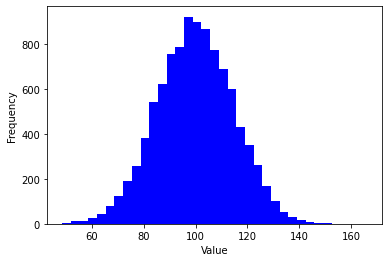

In [17]:
m=100
s=15
x=np.random.normal(m,s,10000)
ax=plt.gca()
ax.hist(x,bins=35,color='b')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
plt.show()

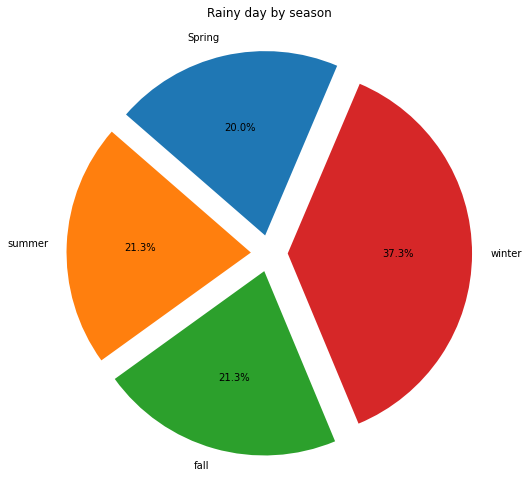

In [18]:
plt.figure(1,figsize=(8,8))
ax=plt.axes([0.1,0.1,0.8,0.8])

labels='Spring','summer','fall','winter'
values=[15,16,16,28]
explode=[0.1,0.1,0.1,0.1]

plt.pie(values,explode=explode,labels=labels,autopct='%1.1f%%',startangle=67)
plt.title('Rainy day by season')
plt.show()

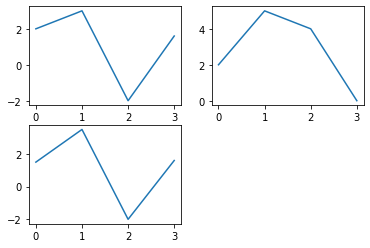

In [20]:
f=plt.figure()
ax1=f.add_subplot(2,2,1)
plt.plot([2,3,-2,1.6])
ax2=f.add_subplot(2,2,2)
plt.plot([2,5,4,0])

ax3=f.add_subplot(2,2,3)

plt.plot([1.5,3.5,-2,1.6])